In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tqdm as tqdm
from sklearn.linear_model import LinearRegression 
import time 
import math
from sklearn import preprocessing



In [2]:
data = pd.read_csv('./datasets/data.csv')
data_gen = pd.read_csv('./datasets/data_w_genres.csv')

In [16]:
data.tail()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
170648,0.608,2020,0.08460,"['Anuel AA', 'Daddy Yankee', 'KAROL G', 'Ozuna...",0.786,301714,0.808,0,0KkIkfsLEJbrcIhYsCL7L5,0.000289,7,0.0822,-3.702,1,China,72,2020-05-29,0.0881,105.029
170649,0.734,2020,0.20600,['Ashnikko'],0.717,150654,0.753,0,0OStKKAuXlxA0fMH54Qs6E,0.000000,7,0.1010,-6.020,1,Halloweenie III: Seven Days,68,2020-10-23,0.0605,137.936
170650,0.637,2020,0.10100,['MAMAMOO'],0.634,211280,0.858,0,4BZXVFYCb76Q0Klojq4piV,0.000009,4,0.2580,-2.226,0,AYA,76,2020-11-03,0.0809,91.688
170651,0.195,2020,0.00998,['Eminem'],0.671,337147,0.623,1,5SiZJoLXp3WOl3J4C8IK0d,0.000008,2,0.6430,-7.161,1,Darkness,70,2020-01-17,0.3080,75.055
170652,0.642,2020,0.13200,"['KEVVO', 'J Balvin']",0.856,189507,0.721,1,7HmnJHfs0BkFzX4x8j0hkl,0.004710,7,0.1820,-4.928,1,Billetes Azules (with J Balvin),74,2020-10-16,0.1080,94.991


In [4]:
data_gen.head()

,genres,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count
0,['show tunes'],"""Cats"" 1981 Original London Cast",0.590111,0.467222,250318.555556,0.394003,0.011400,0.290833,-14.448000,0.210389,117.518111,0.389500,38.333333,5,1,9
1,[],"""Cats"" 1983 Broadway Cast",0.862538,0.441731,287280.000000,0.406808,0.081158,0.315215,-10.690000,0.176212,103.044154,0.268865,30.576923,5,1,26
2,[],"""Fiddler On The Roof” Motion Picture Chorus",0.856571,0.348286,328920.000000,0.286571,0.024593,0.325786,-15.230714,0.118514,77.375857,0.354857,34.857143,0,1,7
3,[],"""Fiddler On The Roof” Motion Picture Orchestra",0.884926,0.425074,262890.962963,0.245770,0.073587,0.275481,-15.639370,0.123200,88.667630,0.372030,34.851852,0,1,27
4,[],"""Joseph And The Amazing Technicolor Dreamcoat""...",0.510714,0.467143,270436.142857,0.488286,0.009400,0.195000,-10.236714,0.098543,122.835857,0.482286,43.000000,5,1,7


In [5]:
data.info

<bound method DataFrame.info of         valence  year  acousticness  \
0        0.0594  1921       0.98200   
1        0.9630  1921       0.73200   
2        0.0394  1921       0.96100   
3        0.1650  1921       0.96700   
4        0.2530  1921       0.95700   
...         ...   ...           ...   
170648   0.6080  2020       0.08460   
170649   0.7340  2020       0.20600   
170650   0.6370  2020       0.10100   
170651   0.1950  2020       0.00998   
170652   0.6420  2020       0.13200   

                                                  artists  danceability  \
0       ['Sergei Rachmaninoff', 'James Levine', 'Berli...         0.279   
1                                          ['Dennis Day']         0.819   
2       ['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...         0.328   
3                                        ['Frank Parker']         0.275   
4                                          ['Phil Regan']         0.418   
...                                              

In [6]:
data.shape

(170653, 19)

In [7]:
data.dtypes

valence             float64
year                  int64
acousticness        float64
artists              object
danceability        float64
duration_ms           int64
energy              float64
explicit              int64
id                   object
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
mode                  int64
name                 object
popularity            int64
release_date         object
speechiness         float64
tempo               float64
dtype: object

In [8]:
data.isnull().sum()

valence             0
year                0
acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
explicit            0
id                  0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
name                0
popularity          0
release_date        0
speechiness         0
tempo               0
dtype: int64

<AxesSubplot:>

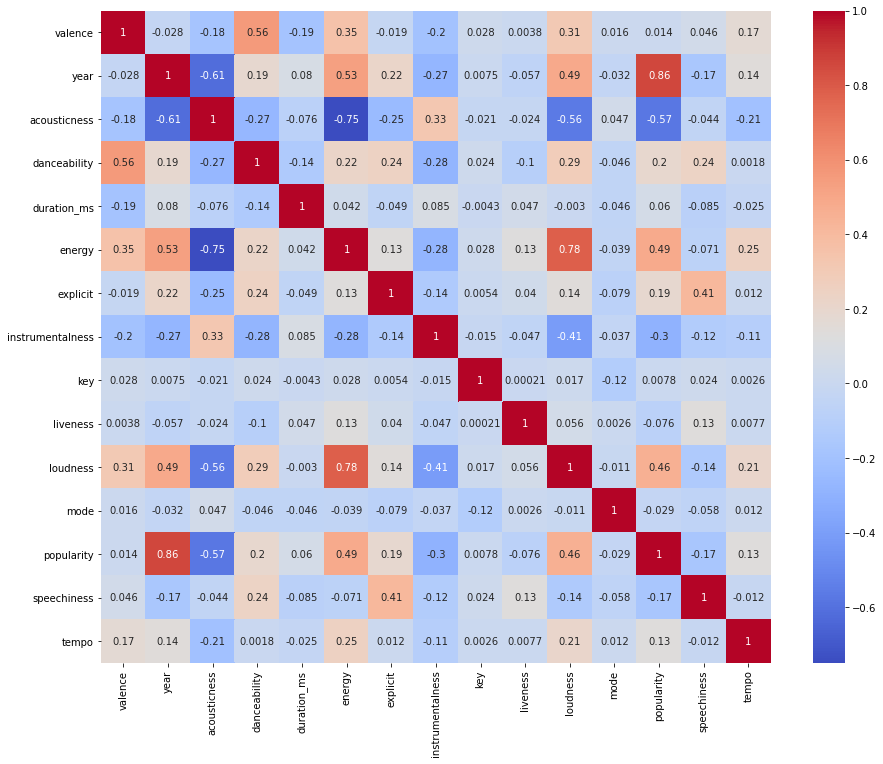

In [9]:
plt.figure(figsize=(15,12))
sns.heatmap(data.corr(), annot=True, cmap = 'coolwarm')

popularity vs year
loudness vs energy
danacibility vs valance

Text(0, 0.5, ' ')

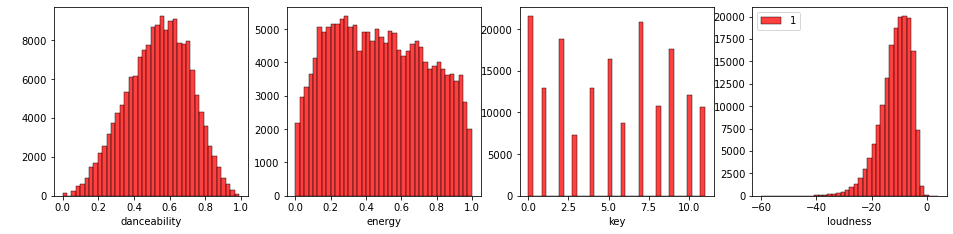

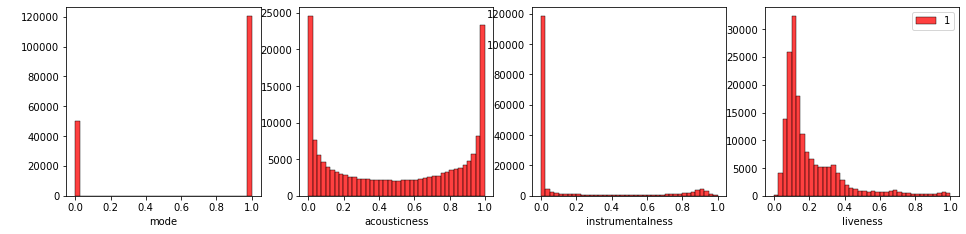

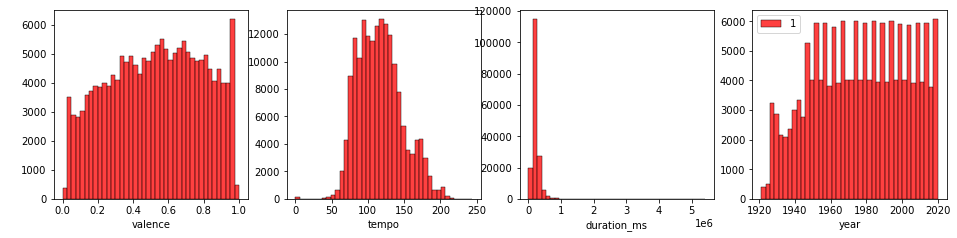

In [10]:
plt.figure(figsize=(16,16))
plt.subplot(4,4,1)
sns.histplot(data['danceability'], color='red', bins=40)
plt.ylabel(" ")
plt.subplot(4,4,2)
sns.histplot(data['energy'], color='red', bins=40)
plt.ylabel(" ")
plt.subplot(4,4,3)
sns.histplot(data['key'], color='red', bins=40)
plt.ylabel(" ")
plt.subplot(4,4,4)
sns.histplot(data['loudness'], color='red', bins=40)
plt.legend((1,0))
plt.ylabel(" ")

plt.figure(figsize=(16,16))
plt.subplot(4,4,1)
sns.histplot(data['mode'], color='red', bins=40)
plt.ylabel(" ")
plt.subplot(4,4,2)
sns.histplot(data['acousticness'], color='red', bins=40)
plt.ylabel(" ")
plt.subplot(4,4,3)
sns.histplot(data['instrumentalness'], color='red', bins=40)
plt.ylabel(" ")
plt.subplot(4,4,4)
sns.histplot(data['liveness'], color='red', bins=40)
plt.legend((1,0))
plt.ylabel(" ")


plt.figure(figsize=(16,16))
plt.subplot(4,4,1)
sns.histplot(data['valence'], color='red', bins=40)
plt.ylabel(" ")
plt.subplot(4,4,2)
sns.histplot(data['tempo'], color='red', bins=40)
plt.ylabel(" ")
plt.subplot(4,4,3)
sns.histplot(data['duration_ms'], color='red', bins=40)
plt.ylabel(" ")
plt.subplot(4,4,4)
sns.histplot(data['year'], color='red', bins=40)
plt.legend((1,0))
plt.ylabel(" ")

Text(0.5, 0, 'Year')

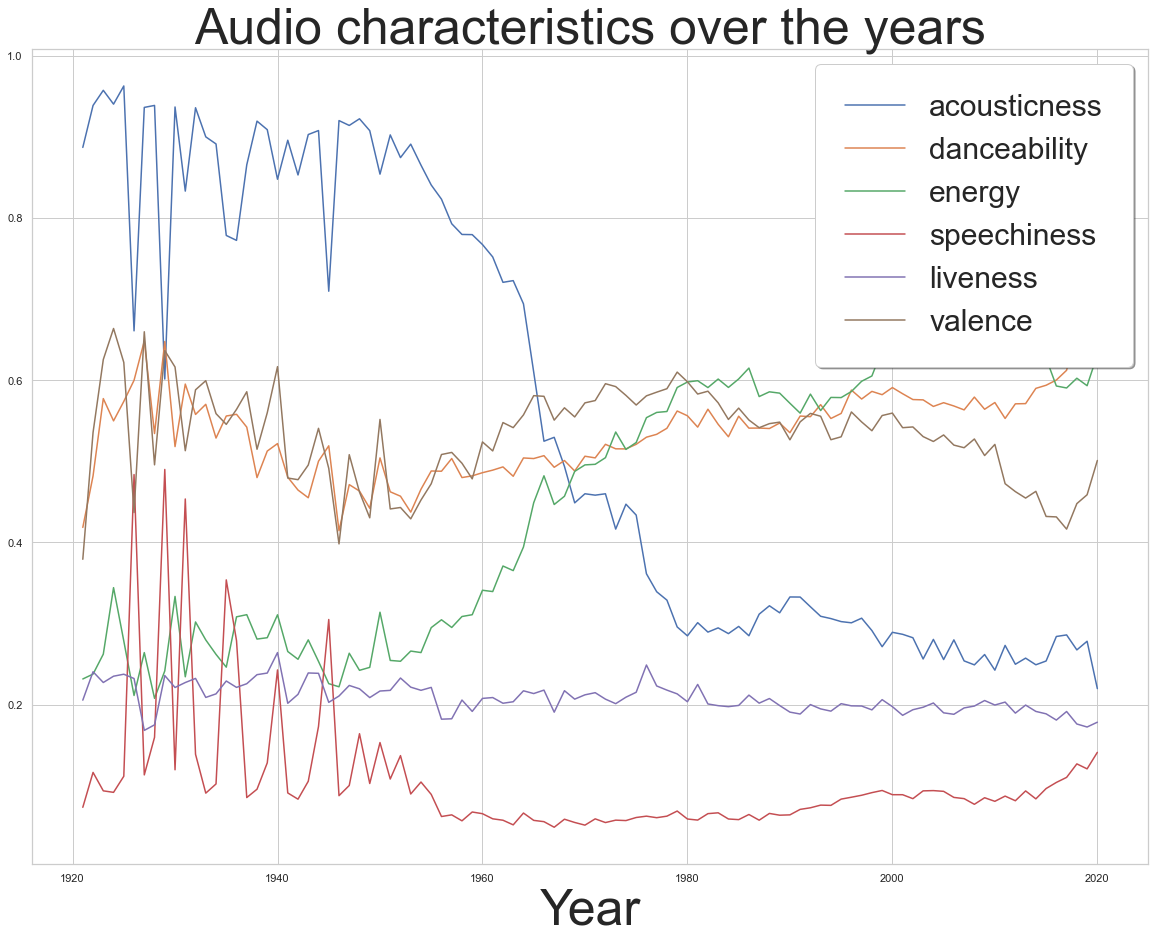

In [11]:
plt.figure(figsize=(20, 15))
sns.set(style="whitegrid")
columns = ["acousticness","danceability","energy","speechiness","liveness","valence"]
for col in columns:
    x = data.groupby("year")[col].mean()
    ax= sns.lineplot(x=x.index,y=x,label=col)
ax.set_title('Audio characteristics over the years', fontsize = 50)
ax.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1, prop={'size': 30}, loc = 'upper right')
ax.set_ylabel('', fontsize = 50)
ax.set_xlabel('Year', fontsize = 50)

Text(0.5, 0, 'Year')

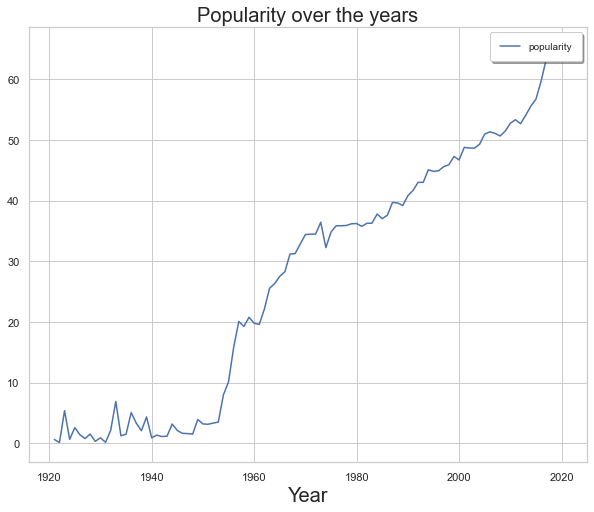

In [12]:
plt.figure(figsize=(10, 8))
sns.set(style="whitegrid")
columns = ["popularity"]
for col in columns:
    x = data.groupby("year")[col].mean()
    ax= sns.lineplot(x=x.index,y=x,label=col)
ax.set_title('Popularity over the years', fontsize = 20)
ax.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1, prop={'size': 10}, loc = 'upper right')
ax.set_ylabel('', fontsize = 20)
ax.set_xlabel('Year', fontsize = 20)

In [13]:
data['artists'] = data['artists'].str.replace("'","")
data['artists'] = data['artists'].str.replace("[","")
data['artists'] = data['artists'].str.replace("]","")

In [14]:
data_2000_2020 = data[data['year'] >= 2000]

In [15]:
data_1920_1940 = data[data['year'] <= 1940]

In [16]:
data_1920_1940.shape

(16675, 19)

In [17]:
data_2000_2020_mod = data.drop(columns=['id'])

In [18]:
data_2000_2020_mod = pd.get_dummies(data_2000_2020)
data_2000_2020_mod.head()

,valence,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,...,release_date_2020-11-11,release_date_2020-11-12,release_date_2020-11-13,release_date_2020-11-16,release_date_2020-11-17,release_date_2020-11-18,release_date_2020-11-19,release_date_2020-11-20,release_date_2020-11-23,release_date_2020-11-24
15606,0.285,2000,0.00239,0.429,266773,0.661,0,0.000121,11,0.2340,...,0,0,0,0,0,0,0,0,0,0
15607,0.613,2000,0.14300,0.843,270507,0.806,1,0.000000,4,0.0771,...,0,0,0,0,0,0,0,0,0,0
15608,0.400,2000,0.00958,0.556,216880,0.864,0,0.000000,3,0.2090,...,0,0,0,0,0,0,0,0,0,0
15609,0.543,2000,0.00664,0.545,233933,0.865,0,0.000011,11,0.1680,...,0,0,0,0,0,0,0,0,0,0
15610,0.760,2000,0.03020,0.949,284200,0.661,1,0.000000,5,0.0454,...,0,0,0,0,0,0,0,0,0,0


In [19]:
data_200020 = data_2000_2020_mod.copy()
#labl =[3,2,1]
#pop_200020 = pd.cut(data_200020['popularity'],[-1,15,30,100], labels=labl)


In [20]:
x1 = data_200020
scaler = preprocessing.RobustScaler()
scaler.fit(x1)

RobustScaler()

In [21]:
print(x1)

        valence  year  acousticness  danceability  duration_ms  energy  \
15606     0.285  2000       0.00239         0.429       266773   0.661   
15607     0.613  2000       0.14300         0.843       270507   0.806   
15608     0.400  2000       0.00958         0.556       216880   0.864   
15609     0.543  2000       0.00664         0.545       233933   0.865   
15610     0.760  2000       0.03020         0.949       284200   0.661   
...         ...   ...           ...           ...          ...     ...   
170648    0.608  2020       0.08460         0.786       301714   0.808   
170649    0.734  2020       0.20600         0.717       150654   0.753   
170650    0.637  2020       0.10100         0.634       211280   0.858   
170651    0.195  2020       0.00998         0.671       337147   0.623   
170652    0.642  2020       0.13200         0.856       189507   0.721   

        explicit  instrumentalness  key  liveness  ...  \
15606          0          0.000121   11    0.2340  ..

In [16]:
display(len(data_2000_2020['artists'].value_counts()))
valcnt1 = data_2000_2020['artists'].value_counts()
display(valcnt1)

15293

Taylor Swift                  207
Eminem                        134
BTS                           132
Drake                         122
Mac Miller                    106
                             ... 
Ja Rule, Fat Joe, Jadakiss      1
Prima J                         1
DJ Casper, Hardino              1
Carnifex                        1
YN Jay, Louie Ray               1
Name: artists, Length: 15293, dtype: int64

In [17]:
#val_over50=[valcnt1.index[i] for i, e in enumerate(valcnt1) if e>=100]

In [17]:
def inputPopularity(cols):
    if cols>=5 and cols< 15:
        return 1
    elif cols>=15 and cols<25:
        return 2
    elif cols>=29 and cols<35:
        return 3
    elif cols>=39 and cols<45:
        return 4
    elif cols>=49 and cols<55:
        return 5
    elif cols>=59 and cols<65:
        return 6
    elif cols>=69 and cols<75:
        return 7
    elif cols>=79 and cols<85:
        return 8
    elif cols>=89 and cols<95:
        return 9
    else:
        return 0
data['popularityCategory'] = data['popularity'].apply(inputPopularity)

<AxesSubplot:>

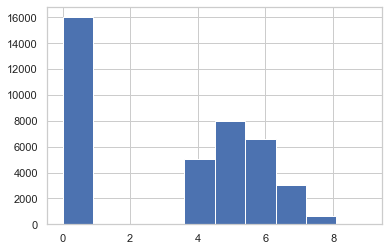

In [36]:
data[data.year>2000]['popularityCategory'].hist()

15806     0
15807     0
15809     0
15812     0
15813     0
         ..
170643    0
170644    0
170646    0
170649    0
170650    0
Name: popularityCategory, Length: 16049, dtype: int64

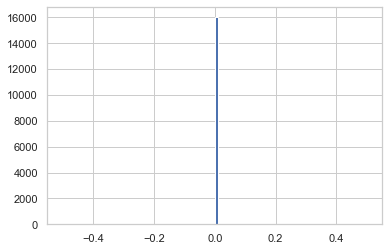

In [42]:
data[(data.year>2000) & (data.popularityCategory<0.1)]['popularityCategory'].hist(bins = 100)
data[(data.year>2000) & (data.popularityCategory<2)]['popularityCategory']


<AxesSubplot:>

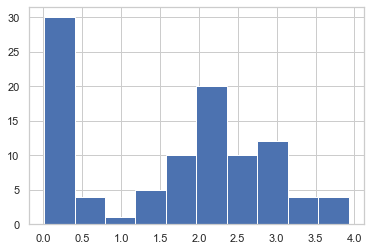

In [33]:
data.groupby('year').mean()['popularityCategory'].hist()

In [ ]:
data_1920_1940.to_csv('data_1920_1940.csv', index=False)

In [ ]:
data_2000_2020.to_csv('data_2000_2020.csv', index=False)

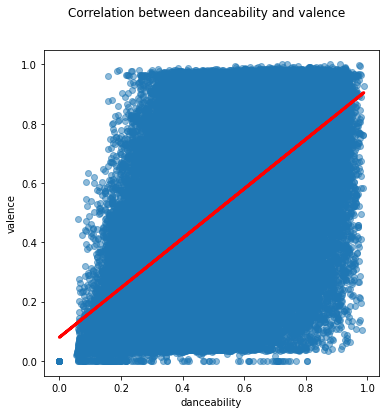

In [21]:
x1 = data["danceability"].values
y1 = data["valence"].values

x1 = x1.reshape(x1.shape[0], 1)
y1 = y1.reshape(y1.shape[0], 1)

regr = LinearRegression()
regr.fit(x1, y1)

fig = plt.figure(figsize=(6, 6))
fig.suptitle("Correlation between danceability and valence")

ax = plt.subplot(1, 1, 1)
ax.scatter(x1, y1, alpha=0.5)
ax.plot(x1, regr.predict(x1), color="red", linewidth=3)

plt.xlabel("danceability")
plt.ylabel("valence")

plt.show()


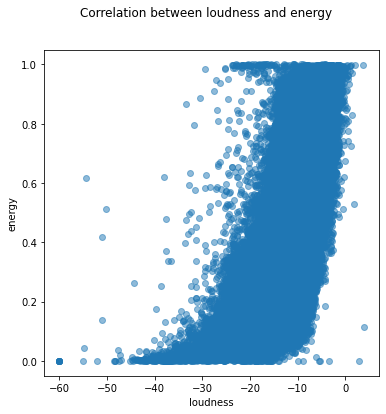

In [22]:
x2 = data["loudness"].values
y2 = data["energy"].values

x2 = x2.reshape(x2.shape[0], 1)
y2 = y2.reshape(y2.shape[0], 1)

regr = LinearRegression()
regr.fit(x2, y2)

fig2 = plt.figure(figsize=(6, 6))
fig2.suptitle("Correlation between loudness and energy")

ax2 = plt.subplot(1, 1, 1)
ax2.scatter(x2, y2, alpha=0.5)


plt.xlabel("loudness")
plt.ylabel("energy")

plt.show()